## Problem 1:

### Approximate the following function:
$\Large f ( x ) = 𝑥^3−2𝑥^2+3𝑥−1 $


### Steps:
1. Randomly generate the data. Generate at least 10,000 values for $x \in [-100,100]$
2. Plot the function
3. Design a feed-forward network with 2 or more hidden layers. Choose the # of hidden units in each layer (what are the size of input and output layers?)
4. Train the model (What loss function will be suitable here?)
5. Generate a test data and present the test accuracy

## Problem 2:

### Feedforward Network
- Hidden layer 1
- Input size 784 [28X28] image
- Hidden layer units 500
- Output size 10
- Other Hyperparameters:
 - num_epochs = 5
 - batch_size = 100
 - learning_rate = 0.001

### Try out different regularization and optimization techniques and vary the corresponding hyperparameters
- Hidden layers/units per layer
- L2 regularization
- Dropout
- RMSProp
- Adam
- Minibatches

### Tabulate your findings

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### Problem 1: Approximating the function: $\ f(x) = 𝑥^3−2𝑥^2+3𝑥−1$

In [ ]:
# Randomly generating data
x = np.random.uniform(-100, 100, 10000)
y = x**3 - 2*x**2 + 3*x - 1

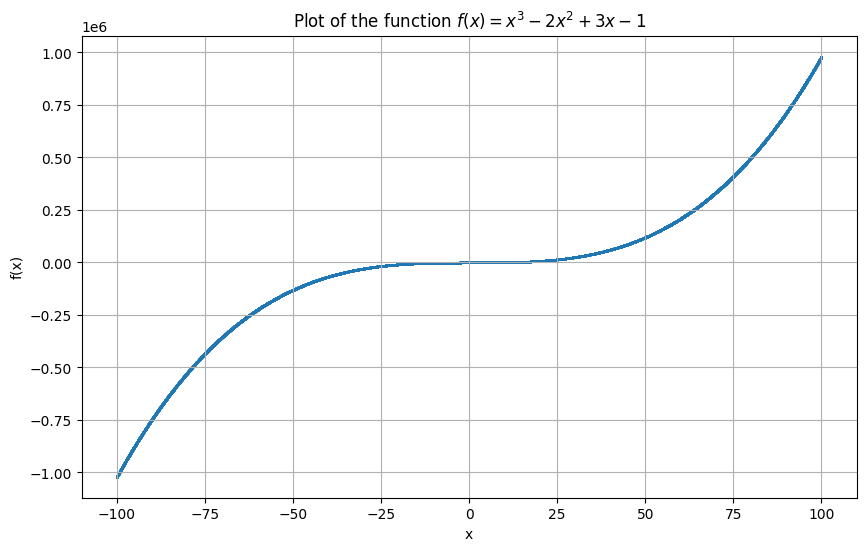

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=1)
plt.title('Plot of the function $f(x) = x^3 - 2x^2 + 3x - 1$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

In [ ]:
# Designing the Feed-Forward Network
class FunctionApproximationNN(nn.Module):
    def __init__(self):
        super(FunctionApproximationNN, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        out = self.fc3(x)
        return out

In [ ]:
# Training the model
# Preparing data for PyTorch
X_train = torch.FloatTensor(x).view(-1, 1)
y_train = torch.FloatTensor(y).view(-1, 1)

model = FunctionApproximationNN()
criterion = nn.MSELoss()  # Suitable loss function for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training the loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 143596666880.0000
Epoch [200/1000], Loss: 140084543488.0000
Epoch [300/1000], Loss: 131566280704.0000
Epoch [400/1000], Loss: 116973543424.0000
Epoch [500/1000], Loss: 97074192384.0000
Epoch [600/1000], Loss: 74699014144.0000
Epoch [700/1000], Loss: 53996716032.0000
Epoch [800/1000], Loss: 38576340992.0000
Epoch [900/1000], Loss: 29568632832.0000
Epoch [1000/1000], Loss: 25489115136.0000


In [ ]:
# Generating test data and presenting the test accuracy
with torch.no_grad():
    model.eval()
    test_x = torch.linspace(-100, 100, 1000).view(-1, 1)
    test_y = test_x**3 - 2*test_x**2 + 3*test_x - 1
    predictions = model(test_x)

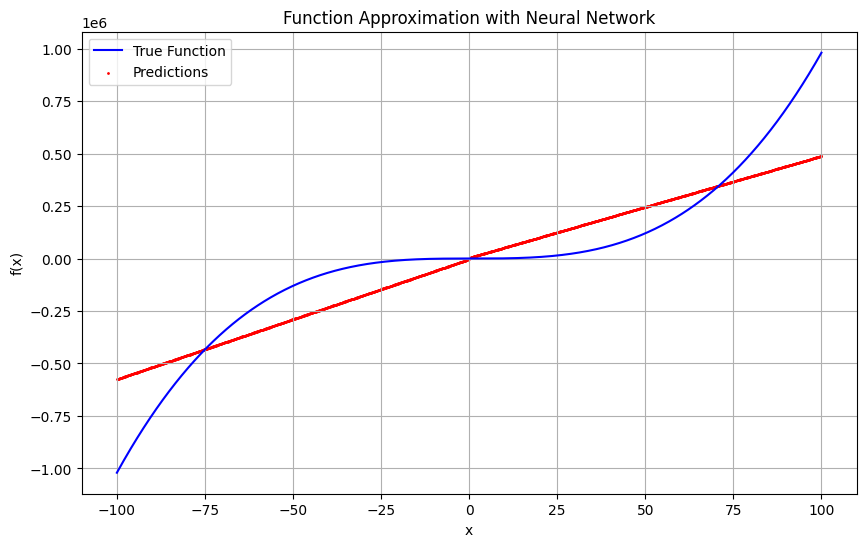

In [ ]:
# Plotting the predictions against the true function
plt.figure(figsize=(10, 6))
plt.plot(test_x.numpy(), test_y.numpy(), label='True Function', color='blue')
plt.scatter(test_x.numpy(), predictions.numpy(), s=1, label='Predictions', color='red')
plt.title('Function Approximation with Neural Network')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

# Problem 2: Feedforward Network for MNIST Classification

In [ ]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

### Defining the network

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # second hidden layer
        self.fc3 = nn.Linear(hidden_size, num_classes)  # Output layer

    def forward(self, x):
        x = x.view(-1, input_size)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        out = self.fc3(x)
        return out

### Loading the datasets

<i>
#### Note: If the following code does not work, do the following:
- open a terminal and enter
- pip install ipywidgets
- jupyter nbextension enable --py widgetsnbextension

#### If the second line shows [OK], it should work </i>

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='data',
                                           train=True,
                                           transform=transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, shuffle=True)

In [ ]:
test_dataset = torchvision.datasets.MNIST(root='data',
                                           train=False,
                                           transform=transforms.ToTensor(),download=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size, shuffle=True)

##### Display samples

9


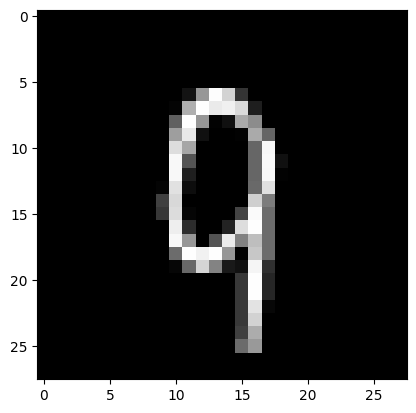

In [ ]:
import matplotlib.pyplot as plt

for images, labels in train_loader:
    print(labels[0].item())
    plt.imshow(images[0].reshape((28,28)), cmap='gray')
    plt.show()
    break

# Initialize the model, loss function, and optimizer

In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Train the model

In [ ]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reconfiguring the images into a 1D vector (actually, (X,1) tensor)
        images = images.view(-1, input_size)

        # Forward pass
        ### Computing the output and loss
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        # displaying the progress
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/600], Loss: 0.3601
Epoch [1/5], Step [200/600], Loss: 0.2319
Epoch [1/5], Step [300/600], Loss: 0.1352
Epoch [1/5], Step [400/600], Loss: 0.2015
Epoch [1/5], Step [500/600], Loss: 0.1384
Epoch [1/5], Step [600/600], Loss: 0.1246
Epoch [2/5], Step [100/600], Loss: 0.2033
Epoch [2/5], Step [200/600], Loss: 0.0610
Epoch [2/5], Step [300/600], Loss: 0.0336
Epoch [2/5], Step [400/600], Loss: 0.0379
Epoch [2/5], Step [500/600], Loss: 0.0962
Epoch [2/5], Step [600/600], Loss: 0.0425
Epoch [3/5], Step [100/600], Loss: 0.0614
Epoch [3/5], Step [200/600], Loss: 0.0335
Epoch [3/5], Step [300/600], Loss: 0.0470
Epoch [3/5], Step [400/600], Loss: 0.0399
Epoch [3/5], Step [500/600], Loss: 0.0623
Epoch [3/5], Step [600/600], Loss: 0.0511
Epoch [4/5], Step [100/600], Loss: 0.0230
Epoch [4/5], Step [200/600], Loss: 0.0202
Epoch [4/5], Step [300/600], Loss: 0.1457
Epoch [4/5], Step [400/600], Loss: 0.0159
Epoch [4/5], Step [500/600], Loss: 0.0289
Epoch [4/5], Step [600/600], Loss:

#### Taking 4 samples from the test set
- display the image
- print the true label
- print the output probability distribution
- print the predicted class

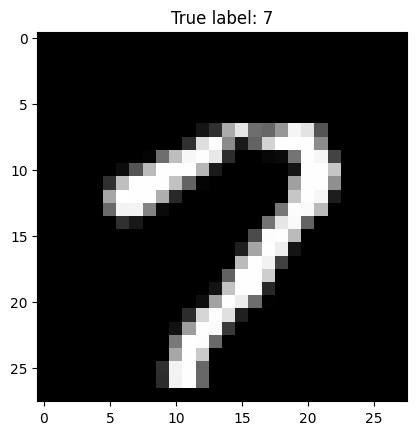

Output Probability Distribution: [[7.9245819e-09 5.7746082e-08 3.5306207e-06 1.4644222e-07 1.3914396e-07
  1.0506894e-09 1.2059598e-12 9.9994397e-01 3.7360144e-07 5.1740775e-05]]
Predicted Class: 7


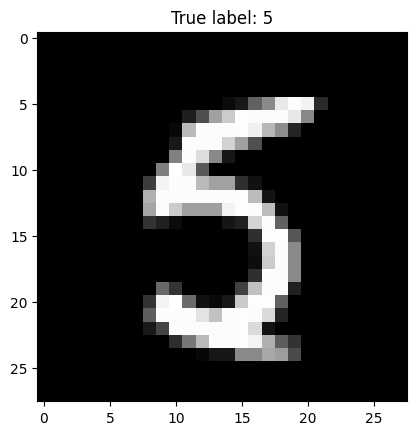

Output Probability Distribution: [[4.6396642e-10 2.8073680e-08 7.1312421e-11 1.0183102e-04 3.7366545e-13
  9.9989522e-01 1.2421005e-09 1.0736016e-10 2.5043606e-08 2.9829041e-06]]
Predicted Class: 5


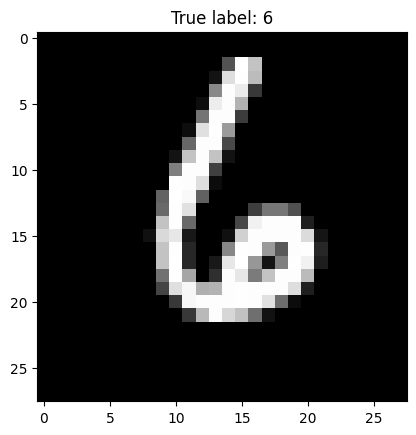

Output Probability Distribution: [[3.85248967e-07 3.56244914e-06 8.41131339e-07 1.28278921e-09
  7.26436410e-05 3.28160930e-08 9.99922514e-01 8.50282067e-09
  9.47968037e-10 1.26971305e-08]]
Predicted Class: 6


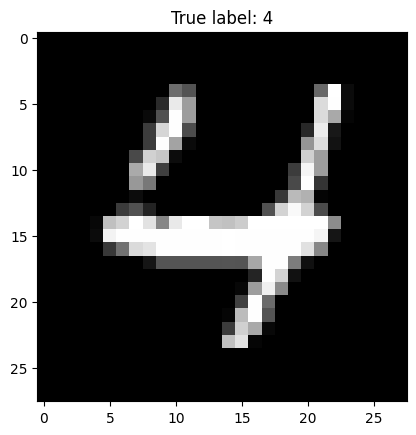

Output Probability Distribution: [[8.2933335e-14 3.8399094e-08 3.1072226e-08 1.4778108e-11 9.9995005e-01
  5.6162529e-13 4.3431114e-12 4.9918101e-05 4.8729098e-13 9.0339916e-11]]
Predicted Class: 4


In [ ]:
model.eval()  # Setting the model to evaluation mode
with torch.no_grad():
    for images, labels in test_loader:
        for i in range(4):  # Taking 4 samples
            plt.imshow(images[i].reshape((28,28)), cmap='gray')
            plt.title(f'True label: {labels[i].item()}')
            plt.show()

            output = model(images[i].view(-1, input_size))
            probability_distribution = torch.softmax(output, dim=1)
            predicted_class = torch.argmax(probability_distribution).item()
            print(f'Output Probability Distribution: {probability_distribution.numpy()}')
            print(f'Predicted Class: {predicted_class}')
        break

**Try out different regularization and optimization techniques and vary the corresponding hyperparameters
Hidden layers/units per layer,
L2 regularization,
Dropout,
RMSProp,
Adam,
Minibatches**

In [ ]:
# Extending the Neural Network with Dropout
class ExtendedNeuralNet(nn.Module):
    def __init__(self,f input_size, hidden_size, num_classes, dropout_rate=0.0):
        super(ExtendedNeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout1 = nn.Dropout(dropout_rate)  # Dropout for first hidden layer
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.dropout2 = nn.Dropout(dropout_rate)  # Dropout for second hidden layer
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(-1, input_size)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        out = self.fc3(x)
        return out


In [ ]:
def train_and_evaluate(model, optimizer, criterion, num_epochs=5, reg_type=None, reg_value=0.0):
    # Training loop
    model.train()
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            if reg_type == 'L2':
                # Add L2 regularization term
                l2_reg = torch.tensor(0.0, requires_grad=True)
                for param in model.parameters():
                    l2_reg = l2_reg + torch.norm(param)
                loss = loss + reg_value * l2_reg

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{total_step}], Loss: {loss.item():.4f}')

    # Evaluation loop
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return loss.item(), accuracy


In [ ]:
# Tabulation of results
results = []

# Defining configurations for different regularizations and optimizers
configs = [
    {"optimizer": "Adam", "dropout": 0.0, "l2": 0.0},
    {"optimizer": "Adam", "dropout": 0.2, "l2": 0.0},
    {"optimizer": "Adam", "dropout": 0.5, "l2": 0.0},
    {"optimizer": "Adam", "dropout": 0.0, "l2": 0.01},
    {"optimizer": "RMSProp", "dropout": 0.0, "l2": 0.0},
    {"optimizer": "SGD", "dropout": 0.0, "l2": 0.0},
]


In [ ]:
for config in configs:
    # Creating the model with the dropout rate from the config
    model = ExtendedNeuralNet(input_size, hidden_size, num_classes, dropout_rate=config["dropout"])

    # Choosing the optimizer
    if config["optimizer"] == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif config["optimizer"] == "RMSProp":
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
    elif config["optimizer"] == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Choosing the loss function
    criterion = nn.CrossEntropyLoss()

    # Training and evaluate the model
    l2_value = config["l2"]
    reg_type = "L2" if l2_value > 0 else None

    print(f"\nTraining with optimizer: {config['optimizer']}, dropout: {config['dropout']}, L2: {l2_value}")
    loss, accuracy = train_and_evaluate(model, optimizer, criterion, reg_type=reg_type, reg_value=l2_value)

    # Results
    results.append({
        "Optimizer": config["optimizer"],
        "Dropout Rate": config["dropout"],
        "L2 Value": l2_value,
        "Final Loss": loss,
        "Accuracy": accuracy
    })



Training with optimizer: Adam, dropout: 0.0, L2: 0.0
Epoch [1/5], Step [100/600], Loss: 0.2919
Epoch [1/5], Step [200/600], Loss: 0.2153
Epoch [1/5], Step [300/600], Loss: 0.0747
Epoch [1/5], Step [400/600], Loss: 0.2191
Epoch [1/5], Step [500/600], Loss: 0.1586
Epoch [1/5], Step [600/600], Loss: 0.1557
Epoch [2/5], Step [100/600], Loss: 0.0914
Epoch [2/5], Step [200/600], Loss: 0.0358
Epoch [2/5], Step [300/600], Loss: 0.1028
Epoch [2/5], Step [400/600], Loss: 0.0328
Epoch [2/5], Step [500/600], Loss: 0.1630
Epoch [2/5], Step [600/600], Loss: 0.1675
Epoch [3/5], Step [100/600], Loss: 0.0393
Epoch [3/5], Step [200/600], Loss: 0.1224
Epoch [3/5], Step [300/600], Loss: 0.0488
Epoch [3/5], Step [400/600], Loss: 0.0256
Epoch [3/5], Step [500/600], Loss: 0.0710
Epoch [3/5], Step [600/600], Loss: 0.0293
Epoch [4/5], Step [100/600], Loss: 0.0229
Epoch [4/5], Step [200/600], Loss: 0.0555
Epoch [4/5], Step [300/600], Loss: 0.0653
Epoch [4/5], Step [400/600], Loss: 0.0774
Epoch [4/5], Step [500

In [ ]:
# results in a tabular format
df_results = pd.DataFrame(results)
print(df_results)


  Optimizer  Dropout Rate  L2 Value  Final Loss  Accuracy
0      Adam           0.0      0.00    0.098392     97.61
1      Adam           0.2      0.00    0.008364     98.10
2      Adam           0.5      0.00    0.070130     97.92
3      Adam           0.0      0.01    0.290913     97.33
4   RMSProp           0.0      0.00    0.014478     98.08
5       SGD           0.0      0.00    2.077966     65.68
